### Predicting Car Prices using K-Nearest Neighbors

Applied Machine learning workflow to predict a car's market price using its attributes. 
For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

#### Imported all required modules.

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
column_names= ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars= pd.read_csv('imports-85.data', names= column_names)
cars.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

#### Data Cleaning

In [4]:
values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
num_cars = cars[values_cols]
num_cars.replace('?', np.nan, inplace=True)

In [5]:
num_cars.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500


In [6]:
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [7]:
num_cars= num_cars.astype(float)

In [8]:
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


In [9]:
num_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

##### As price col is a target col, so I've removed those 4 missing values directly.

In [10]:
num_cars = num_cars.dropna(subset=['price'])
num_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

##### For other missing value  I've replaced them with average values from particular column.

In [11]:
num_cars = num_cars.fillna(num_cars.mean())
num_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

##### Normalized the numeric columns
So all values range from 0 to 1.

In [12]:
normalized_cars= (num_cars-num_cars.mean())/num_cars.std()
normalized_cars.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,0.036224
1,0.0,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,0.414350
2,0.0,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,0.414350


In [13]:
normalized_cars['price']= num_cars['price']
normalized_cars.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.0,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.0,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0


#### Univariate Model

In [14]:
from sklearn.model_selection import train_test_split

def knn_train_test(feature,target, df):
    
    X= df[[feature]]
    y= df[target]   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 15)
    
    knn= KNeighborsRegressor()  
    knn.fit(X_train, y_train)
    predictions= knn.predict(X_test)    
    mse= mean_squared_error(y_test, predictions)
    rmse= mse ** (1/2)
    
    return rmse

In [15]:
knn_train_test('highway-mpg','price',normalized_cars)

3707.8404614874057

###### Using all of the features as Univariate.

In [16]:
rmses= dict()

#train_cols= normalized_cars.columns.drop('price')
train_cols= normalized_cars.drop('price', axis=1)

for column in train_cols:
    rmse= knn_train_test(column, 'price', normalized_cars)
    rmses[column]= rmse
    
rmses    

{'bore': 5792.33548826615,
 'city-mpg': 3924.68935371161,
 'compression-rate': 6098.378145884041,
 'curb-weight': 3646.8452464787565,
 'engine-size': 3227.680848352812,
 'height': 5963.537904008745,
 'highway-mpg': 3707.8404614874057,
 'horsepower': 3844.4913948019034,
 'length': 4875.972161769685,
 'normalized-losses': 6671.127519363412,
 'peak-rpm': 6749.008090721736,
 'stroke': 6128.3136806011435,
 'wheel-base': 5116.011941147204,
 'width': 4309.467212872553}

###### 'engine-size' col has low rmse value: 3227.68 

###### Different values of K.

In [17]:
def knn_train_test_k(feature, target, df):
    
    X= df[[feature]]
    y= df[target]    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 15)
    
    k_values= [1,3,5,7,8]
    rmses= dict()
    
    for k in k_values:
        knn= KNeighborsRegressor(n_neighbors=k)
        
          
        knn.fit(X_train, y_train)
        predictions= knn.predict(X_test)    
        mse= mean_squared_error(y_test, predictions)
        rmse= mse ** (1/2)
        
        rmses[k]= rmse
    return rmses    

In [18]:
rmses_k_results= dict()

train_cols= normalized_cars.columns.drop('price')
for column in train_cols:
    rmse= knn_train_test_k(column,'price',normalized_cars)
    rmses_k_results[column]= rmse
    
rmses_k_results 

{'bore': {1: 12623.96105218401,
  3: 6793.446098982617,
  5: 5792.33548826615,
  7: 5741.210139922445,
  8: 6128.493267398922},
 'city-mpg': {1: 4274.32714347086,
  3: 4152.473768836049,
  5: 3924.68935371161,
  7: 3893.496684289358,
  8: 3922.80908105366},
 'compression-rate': {1: 5874.227742318768,
  3: 6303.888648060494,
  5: 6098.378145884041,
  7: 5633.821421018026,
  8: 5492.064148748683},
 'curb-weight': {1: 5390.848574477044,
  3: 3745.6067846458714,
  5: 3646.8452464787565,
  7: 3233.309444947501,
  8: 3233.075157439425},
 'engine-size': {1: 3664.8209811025436,
  3: 3310.004776569821,
  5: 3227.680848352812,
  7: 3243.5645859592983,
  8: 3294.102037127099},
 'height': {1: 7816.194129284831,
  3: 6290.479523373948,
  5: 5963.537904008745,
  7: 6080.533905919151,
  8: 6287.647947256565},
 'highway-mpg': {1: 5064.184170597026,
  3: 3856.7233335384185,
  5: 3707.8404614874057,
  7: 3933.4222657487817,
  8: 4002.7525102602344},
 'horsepower': {1: 4644.292856534233,
  3: 4106.283929

###### Visualizing the results.

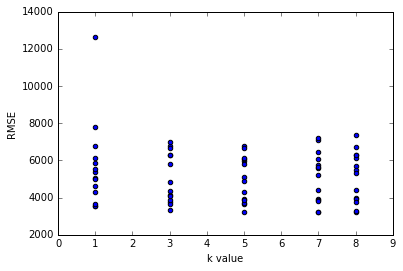

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

for i, j in rmses_k_results.items():
    x= list(j.keys())
    y= list(j.values())    
    plt.scatter(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [25]:
feature_avg_rmse = {}

for i, j in rmses_k_results.items():
    x= list(j.keys())
    avg= np.mean(list(j.values())) 
    feature_avg_rmse[i]= avg
    
series_avg_rmse = pd.Series(feature_avg_rmse)  # Created a series
sorted_avg_rmse = series_avg_rmse.sort_values() # Sorted the series
print(sorted_avg_rmse)

engine-size          3348.034646
curb-weight          3849.937042
horsepower           4029.385575
city-mpg             4033.559206
width                4059.341718
highway-mpg          4112.984548
wheel-base           4858.340863
length               5049.041815
compression-rate     5880.476021
stroke               6161.731047
height               6487.678682
normalized-losses    6755.547499
peak-rpm             6794.219514
bore                 7415.889209
dtype: float64


In [26]:
sorted_features = sorted_avg_rmse.index
sorted_features

Index(['engine-size', 'curb-weight', 'horsepower', 'city-mpg', 'width',
       'highway-mpg', 'wheel-base', 'length', 'compression-rate', 'stroke',
       'height', 'normalized-losses', 'peak-rpm', 'bore'],
      dtype='object')

#### Multivariate Model

In [28]:
k_values= [5]
k_values
for k in k_values:
    print(k)

5


In [36]:
def knn_train_test_mul(features, target, df):
    
    X= df[features]
    y= df[target]    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 15)
    
    k_values= [5]
    rmses= dict()
    for k in k_values:
        knn= KNeighborsRegressor(n_neighbors=k)        
        knn.fit(X_train, y_train)
        predictions= knn.predict(X_test)    
        mse= mean_squared_error(y_test, predictions)
        rmse= mse ** (1/2)
        rmses[k]= rmse
    return rmses   

######  Best of 2 to 5 features.

In [37]:
k_rmse_results = {}

for i in range(2,6):
    k_rmse_results[i]= knn_train_test_mul(sorted_features[:i],'price',normalized_cars)

k_rmse_results

{2: {5: 2590.911068164489},
 3: {5: 2609.4582599068485},
 4: {5: 2468.8349622014503},
 5: {5: 2670.893915718033}}

#### Hyperparameter Tuning

In [40]:
def knn_train_test_mult(features, target, df):
    
    X= df[features]
    y= df[target]    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 15)
        
    k_values= range(1,26)
    rmses= dict()
    for k in k_values:
        knn= KNeighborsRegressor(n_neighbors=k)        
        knn.fit(X_train, y_train)
        predictions= knn.predict(X_test)    
        mse= mean_squared_error(y_test, predictions)
        rmse= mse ** (1/2)
        rmses[k]= rmse
    return rmses  

###### Top 3 models

In [41]:
k_rmse_results = {}

for i in range(2,5):
    k_rmse_results[i]= knn_train_test_mult(sorted_features[:i],'price',normalized_cars)
k_rmse_results

{2: {1: 2347.841520188611,
  2: 2351.081714954237,
  3: 2586.0574521787985,
  4: 2607.7160638867376,
  5: 2590.911068164489,
  6: 2569.508028854665,
  7: 2549.151705286805,
  8: 2529.9053243276267,
  9: 2630.9027618462073,
  10: 2728.7740037836575,
  11: 2794.224878656048,
  12: 2810.343406507468,
  13: 2949.2492284258087,
  14: 3040.3950300701968,
  15: 3149.345386903931,
  16: 3121.10875589352,
  17: 3238.613880078596,
  18: 3293.258766197661,
  19: 3358.3560756776856,
  20: 3336.1967356880623,
  21: 3288.117168692512,
  22: 3310.3065765044894,
  23: 3346.178692587939,
  24: 3374.1820093866722,
  25: 3390.9330411832425},
 3: {1: 2182.755189132825,
  2: 2508.7647114568117,
  3: 2580.0075598173344,
  4: 2518.7073657171145,
  5: 2609.4582599068485,
  6: 2670.5713912111687,
  7: 2771.878950886447,
  8: 2755.9773285604538,
  9: 2788.7681053448177,
  10: 2880.8311812228576,
  11: 2954.83601478162,
  12: 3123.65689954292,
  13: 3084.550260405649,
  14: 3168.398204025452,
  15: 3135.23700439

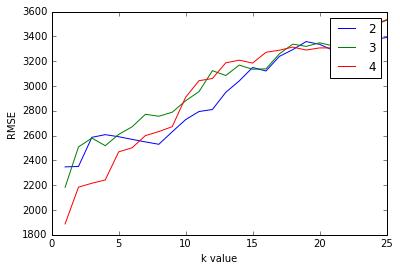

In [46]:
for i, j in k_rmse_results.items():
    
    x= list(j.keys())
    y= list(j.values()) 
    
    plt.plot(x,y, label="{}".format(i))
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend() 

#### Model with the four features perform well as compared to other models.